In [1]:
from rmgpy import settings
from rmgpy.data.rmg import RMGDatabase
from rmgpy.species import Species
from IPython.display import display
from rmgpy.rmg.main import RMG
from rmgpy.cantherm.output import prettify

In [2]:
database = RMGDatabase()

In [3]:
database.load(settings['database.directory'], thermoLibraries='none',\
             kineticsFamilies='none', kineticsDepositories='none', reactionLibraries = [])

thermoDatabase = database.thermo

In [4]:
inputFile = 'polycyclic_qm_inputs/input_total.py'
rmg = RMG()
rmg.loadThermoInput(inputFile)

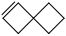

s1_4_4_ene_1
s1_4_4_ene_1 s1_4_4_ene
**********************


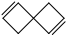

s1_4_4_diene_1_5
s1_4_4_diene_1_5 s1_4_4_diene
**********************


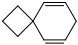

s1_4_6_diene_1_4
s1_4_6_diene_1_4 PolycyclicRing
**********************


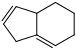

s2_5_6_diene_0_6
s2_5_6_diene_0_6 PolycyclicRing
**********************


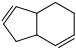

s2_5_6_diene_1_6
s2_5_6_diene_1_6 PolycyclicRing
**********************


In [5]:
for spec in rmg.initialSpecies:
    mole = spec.molecule[0]
    estimatedThermo = thermoDatabase.computeGroupAdditivityThermo(mole)
    ringGroups, polycyclicGroups = thermoDatabase.getRingGroupsFromComments(estimatedThermo)
    assert len(polycyclicGroups) == 1
    if spec.label != polycyclicGroups[0].label:
        display(spec)
        print spec.label
        print spec.label, polycyclicGroups[0].label
        print '**********************'